In [1]:
#standard imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#image import
import imageio

# Original Collection

The image collection from Kaggle is accompanied by a CSV with product information for each image. We can load the CSV into a pandas dataframe to view specifics.

In [2]:
original_df = pd.read_csv('../data/styles.csv')

In [3]:
original_df.shape

(44446, 10)

In [4]:
list(original_df.columns)

['id',
 'gender',
 'masterCategory',
 'subCategory',
 'articleType',
 'baseColour',
 'season',
 'year',
 'usage',
 'productDisplayName']

In [5]:
original_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [11]:
original_df.groupby('masterCategory').count()

,id,gender,subCategory,articleType,baseColour,season,year,usage,productDisplayName
masterCategory,,,,,,,,,
Accessories,11289,11289,11289,11289,11289,11289,11289,11261,11287
Apparel,21400,21400,21400,21400,21394,21399,21399,21376,21400
Footwear,9222,9222,9222,9222,9222,9202,9222,9220,9222
Free Items,105,105,105,105,105,105,105,105,105
Home,1,1,1,1,1,1,1,1,1
Personal Care,2404,2404,2404,2404,2395,2404,2404,2141,2399
Sporting Goods,25,25,25,25,25,25,25,25,25


In [12]:
original_df.groupby(['masterCategory', 'subCategory']).count()

id  gender  articleType  \
masterCategory subCategory                                            
Accessories    Accessories                 143     143          143   
               Bags                       3055    3055         3055   
               Belts                       811     811          811   
               Cufflinks                   108     108          108   
               Eyewear                    1073    1073         1073   
               Gloves                       20      20           20   
               Headwear                    293     293          293   
               Jewellery                  1080    1080         1080   
               Mufflers                     38      38           38   
               Perfumes                      1       1            1   
               Scarves                     118     118          118   
               Shoe Accessories             24      24           24   
               Socks                       686     686          686   
               Sports Accessories            3       3            3   
               Stoles                       90      90           90   
               Ties                        258     258          258   
               Umbrellas                     6       6            6   
               Wallets                     933     933          933   
               Watches                    2542    2542         2542   
               Water Bottle                  7       7            7   
Apparel        Apparel Set                 106     106          106   
               Bottomwear                 2694    2694         2694   
               Dress                       478     478          478   
               Innerwear                  1808    1808         1808   
               Loungewear and Nightwear    470     470          470   
               Saree                       427     427          427   
               Socks                        12      12           12   
               Topwear                   15405   15405        15405   
Footwear       Flip Flops                  915     915          915   
               Sandal                      963     963          963   
               Shoes                      7344    7344         7344   
Free Items     Free Gifts                  104     104          104   
               Vouchers                      1       1            1   
Home           Home Furnishing               1       1            1   
Personal Care  Bath and Body                12      12           12   
               Beauty Accessories            4       4            4   
               Eyes                         43      43           43   
               Fragrance                  1012    1012         1012   
               Hair                         19      19           19   
               Lips                        527     527          527   
               Makeup                      307     307          307   
               Nails                       329     329          329   
               Perfumes                      5       5            5   
               Skin                         69      69           69   
               Skin Care                    77      77           77   
Sporting Goods Sports Equipment             21      21           21   
               Wristbands                    4       4            4   

                                         baseColour  season   year  usage  \
masterCategory subCategory                                                  
Accessories    Accessories                      143     143    143    143   
               Bags                            3055    3055   3055   3055   
               Belts                            811     811    811    811   
               Cufflinks                        108     108    108    108   
               Eyewear                         1073    1073   1073   1073   
               Gloves    

## Context

As stated in the README, I speculate that this data comes from the online inventory for a British department store. The details included were all, presumably, relevant pieces of information for the retailer to have when managing their inventory. That does not mean that all of the information available will be needed (or useful) for image classification. A good first step for exploration is to examine the range and number of different values that fill each column. 

In [6]:
'''
Count the number of groups within a column. 
'''
orig_num_mainCategories = len(original_df.masterCategory.unique())
orig_num_colors = len(original_df.baseColour.unique())
orig_num_articleTypes = len(original_df.articleType.unique())
orig_num_subCategories = len(original_df.subCategory.unique())
orig_num_gender_age = len(original_df.gender.unique())

print('Overview of original dataset: \n')
print(f'{orig_num_mainCategories} Main-Categories')
print(f'{orig_num_subCategories} Sub-Categories')
print(f'{orig_num_articleTypes} Article Types')
print(f'{orig_num_colors} Base Colors')
print(f'{orig_num_gender_age} Gender-Age Subsets')

Overview of original dataset: 

7 Main-Categories
45 Sub-Categories
143 Article Types
47 Base Colors
5 Gender-Age Subsets


### Examine the columns
Many of these columns have the potential to be used as classes in a classification model. We can use **value_counts** to learn the range of values within each column, as well as the distribution of these values within our dataset. 

In [91]:
original_main_cats = original_df.masterCategory.value_counts()
original_main_cats

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

##### Main Categories

The low number of items in the bottom 3 categories may pose problems. There will not be enough images to create a robust sample of the category, especially if the category is comprised of multiple types of products. 

In [93]:
original_gender = original_df.gender.value_counts()
original_gender

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64

In [90]:
original_color = original_df.baseColour.value_counts()
original_color.head(10)

Black        9732
White        5540
Blue         4922
Brown        3494
Grey         2741
Red          2458
Green        2116
Pink         1861
Navy Blue    1791
Purple       1643
Name: baseColour, dtype: int64

In [94]:
original_season = original_df.season.value_counts()
original_season

Summer    21476
Fall      11445
Winter     8519
Spring     2985
Name: season, dtype: int64

In [95]:
original_usage = original_df.usage.value_counts()
original_usage

Casual          34414
Sports           4025
Ethnic           3208
Formal           2359
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

In [98]:
original_year = original_df.year.value_counts()
original_year.head(5)

2012.0    16290
2011.0    13689
2016.0     6007
2017.0     2917
2015.0     2780
Name: year, dtype: int64

In [16]:
original_sub_cats = original_df.subCategory.value_counts().to_dict()
for each in original_main_cats:
    df = original_df[original_df.masterCategory == each]
    x = df.subCategory.value_counts()
    l = len(x)
    m = x.sum()
    v = len(df.articleType.value_counts().index)
    t = len(df.baseColour.value_counts().index)
    print(f'{each}:')
    print(f'{l} Sub-Categories')
    print(f'{v} Article Types')
    print(f'{t} Base Colors')
    print(f'{m} Items\n')
    print(x, '\n')

Apparel:
8 Sub-Categories
58 Article Types
42 Base Colors
21400 Items

Topwear                     15405
Bottomwear                   2694
Innerwear                    1808
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Apparel Set                   106
Socks                          12
Name: subCategory, dtype: int64 

Accessories:
20 Sub-Categories
44 Article Types
44 Base Colors
11289 Items

Bags                  3055
Watches               2542
Jewellery             1080
Eyewear               1073
Wallets                933
Belts                  811
Socks                  686
Headwear               293
Ties                   258
Accessories            143
Scarves                118
Cufflinks              108
Stoles                  90
Mufflers                38
Shoe Accessories        24
Gloves                  20
Water Bottle             7
Umbrellas                6
Sports Accessories       3
Perfumes                 1
Name: s

### Quick bar chart to compare number of images per subcategory 

A number of features of this plot could be improved for better interpretability, but it offers a quick visual comparison, and it highlights the significant class imbalances at both the main and sub-category levels. 

Text(0.5, 1.0, 'Sub-Categories per Main Category')

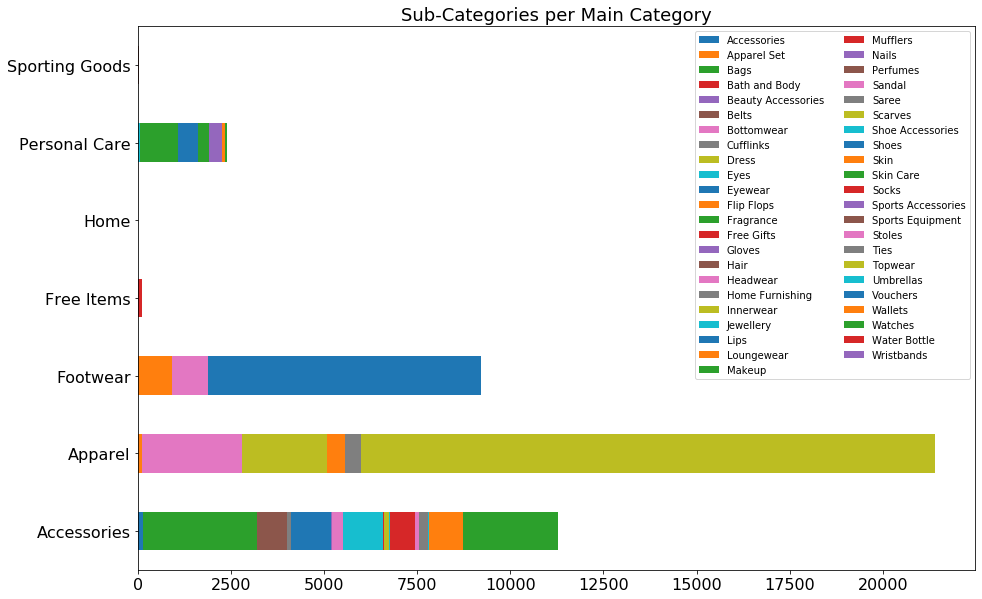

In [86]:
original_df.subCategory = original_df.subCategory.str.replace('Loungewear and Nightwear', 'Loungewear')
original_df2 = original_df[['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0)
original_df3 = original_df2['id']
original_df4 = original_df3.transpose()
original_df3.plot(kind='barh', stacked=True,figsize=(15,10))
plt.ylabel('')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(ncol=2)
plt.title('Sub-Categories per Main Category', fontsize=18)

Full Set Classifiers = Main Category, Gender/Age Group, Color

Subset Classifiers = Sub Category, Article Type

# Refined Collection

In [99]:
df = pd.read_csv('../data/full_labels_df.csv')

### Another quick bar chart
Now that we have cleaned up the dataset, we can have another look at the image counts across different sub-categories. 

Text(0.5, 1.0, 'Sub-Categories per Main Category')

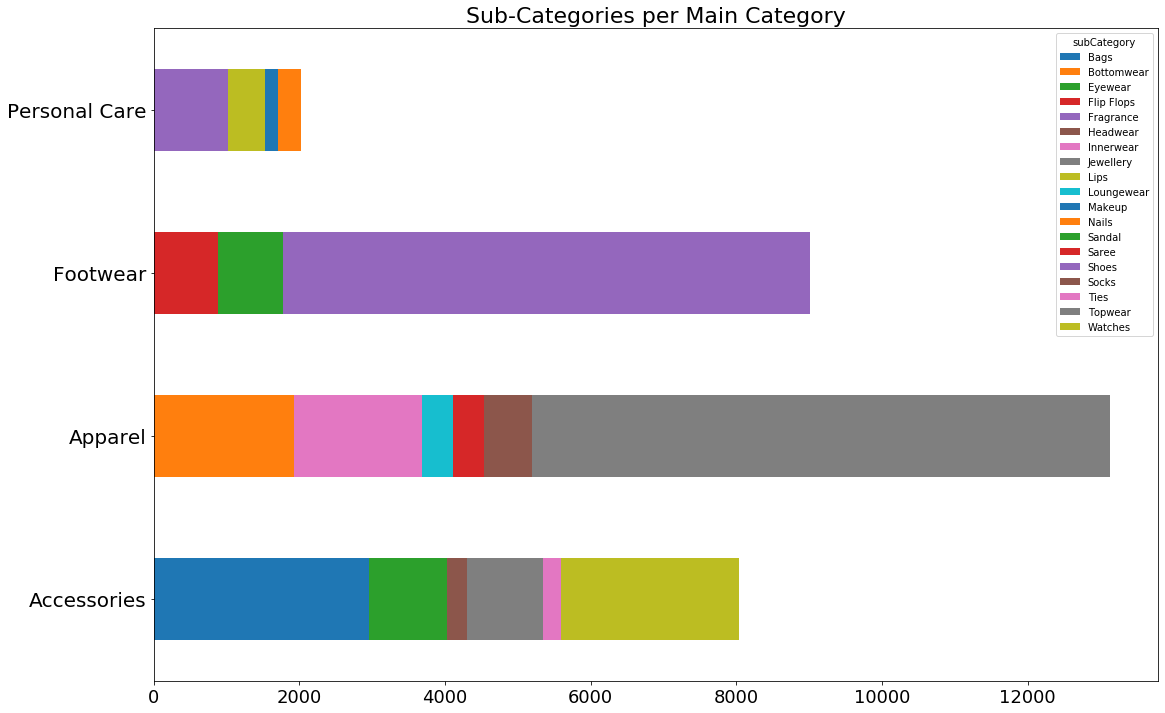

In [140]:
df.subCategory = df.subCategory.str.replace('Loungewear and Nightwear', 'Loungewear')
quick_bar = df[['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id
quick_bar.plot(kind='barh', stacked=True,figsize=(18,12))
plt.ylabel('')
plt.yticks(fontsize=20)
plt.xticks(fontsize=18)
plt.title('Sub-Categories per Main Category', fontsize=22)

### Improved bar charts 
Since this is our final dataset, it is worthwhile to make the chart easier to read, and more pleasant to look at.  

In [138]:
bar_acc = df[df.masterCategory=='Accessories'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id
bar_app = df[df.masterCategory=='Apparel'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id
bar_fw = df[df.masterCategory=='Footwear'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id
bar_pc = df[df.masterCategory=='Personal Care'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id

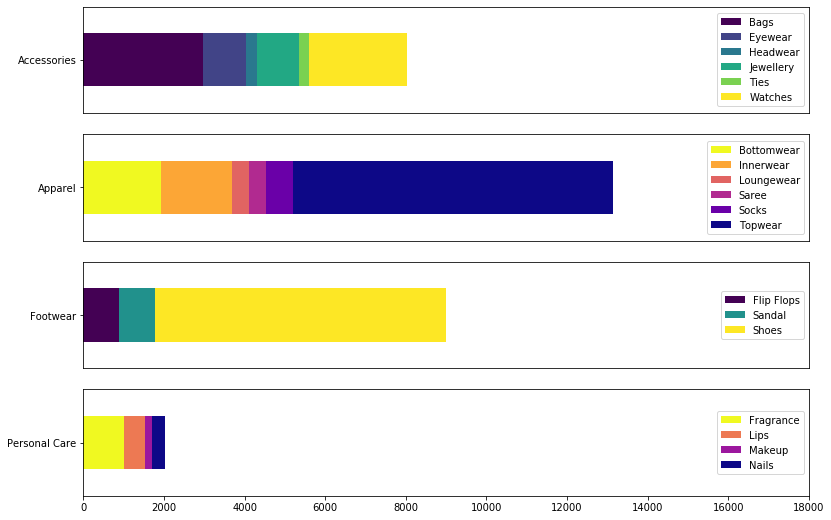

In [142]:
fig, axs = plt.subplots(4, 1, figsize=(13,9))
df_list = [bar_acc, bar_app, bar_fw, bar_pc]
cm_list = ['viridis', 'plasma_r', 'viridis', 'plasma_r']
for idx, ax in enumerate(axs.flatten()):
    df_list[idx].plot(kind='barh', stacked=True, cmap=cm_list[idx], ax=ax)
    ax.set_ylabel('')
    ax.set_xlim(0,18000)
    ax.legend(loc='right', fontsize=10)
    if idx != 3:
        ax.set_xticks([])

        
plt.show()

# The rest of this notebook has not been annotated or revised for clarity. It was used to test code used in load.py, but needs to be cleaned up before it is functional here. 

In [149]:
subcat_list = list(df.subCategory.unique())
len(subcat_list)

19

In [30]:
subCat_counts = {}
for i in range(len(df.subCategory.value_counts().index)):
    s = df.subCategory.value_counts().values[i]
    t = df.subCategory.value_counts().index[i]
    subCat_counts[t] = s


In [13]:
boys_girls = ['Girls', 'Boys']
original_df[original_df.gender.isin(boys_girls)].groupby(['subCategory', 'gender']).count().id

subCategory  gender
Apparel Set  Boys        9
             Girls       3
Bags         Girls       2
Bottomwear   Boys      107
             Girls     135
Dress        Girls      74
Eyewear      Boys        1
             Girls       2
Flip Flops   Boys       16
             Girls       7
Gloves       Boys        6
             Girls       6
Headwear     Boys        1
             Girls       1
Innerwear    Boys        4
             Girls       5
Jewellery    Girls       1
Sandal       Boys       11
             Girls      39
Shoes        Boys       27
             Girls      14
Socks        Boys        7
             Girls       6
Topwear      Boys      633
             Girls     344
Watches      Boys        8
             Girls      16
Name: id, dtype: int64

In [144]:
df[df.masterCategory == 'Apparel'].baseColour.value_counts()

Blue         2210
Black        1962
White        1580
Grey         1214
Red          1118
Green         960
Navy Blue     760
Purple        752
Pink          701
Cream         570
Brown         526
Multi         239
Orange        234
Yellow        191
Tan           112
Name: baseColour, dtype: int64

In [27]:
# df.baseColour.value_counts()

Black                7259
White                3964
Blue                 3527
Brown                3444
Grey                 3244
Red                  2244
Green                1671
Pink                 1358
Purple               1291
Navy Blue            1173
Cream                1001
Orange                466
Tan                   411
Yellow                362
Multi                 334
Steel                 234
Bronze                 83
Copper                 76
Metallic               41
Fluorescent Green       4
Name: baseColour, dtype: int64

In [3]:
# loaded = np.load('data/full_image_arr.npz')
# bw_img = loaded['b']

In [15]:
# labels = df.masterCategory.copy()
# labels = labels.astype('category')
# labels = labels.cat.codes
list(df.subCategory.value_counts().index)

['Topwear',
 'Shoes',
 'Bags',
 'Watches',
 'Bottomwear',
 'Innerwear',
 'Eyewear',
 'Jewellery',
 'Fragrance',
 'Sandal',
 'Flip Flops',
 'Socks',
 'Lips',
 'Loungewear',
 'Saree',
 'Nails',
 'Headwear',
 'Ties',
 'Makeup']

Text(0, 0.5, '')

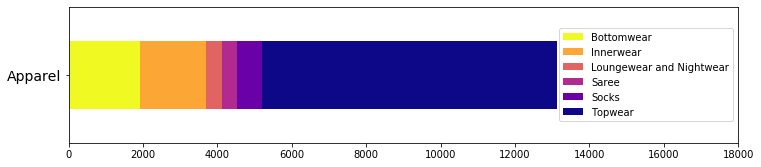

In [104]:
bar_app = df[df.masterCategory=='Apparel'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id
bar_app.plot(kind='barh', stacked=True,figsize=(12,2.5), cmap='plasma_r')
plt.legend(loc='right', fontsize=10)
plt.xlim(0,18000)
plt.yticks(fontsize=14)
plt.ylabel('')

Text(0, 0.5, '')

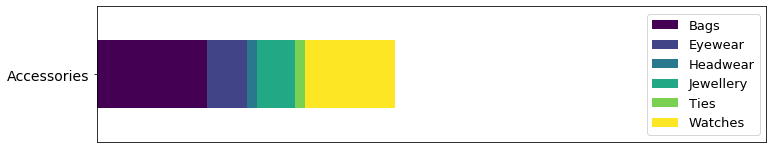

In [105]:
bar_acc = df[df.masterCategory=='Accessories'][['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0).id
bar_acc.plot(kind='barh', stacked=True,figsize=(12,2.5), cmap='viridis')
plt.legend(loc='center right', fontsize=13)
plt.xlim(0,18000)
plt.yticks(fontsize=14)
plt.xticks([])
plt.ylabel('')

In [6]:
masterCat_counts = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().values[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_counts[t] = s
masterCat_counts

{'Apparel': 21341,
 'Accessories': 11004,
 'Footwear': 9119,
 'Personal Care': 2393}

In [9]:
cat_names = pd.Series(list(df.masterCategory.value_counts().index))
cat_counts = df.masterCategory.value_counts().values
df.masterCategory.value_counts().sum()
cat_percent = np.round(df.masterCategory.value_counts().values/43857, 2)
summary_df = pd.DataFrame(cat_names, index=range(4), columns=['Main Category'])
summary_df['Item Count'] = cat_counts
summary_df['Percent of Full Dataset'] = cat_percent
summary_df

,Main Category,Item Count,Percent of Full Dataset
0,Apparel,21341,0.49
1,Accessories,11004,0.25
2,Footwear,9119,0.21
3,Personal Care,2393,0.05


In [39]:
list(df.subCategory.value_counts().index)

Index(['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Eyewear', 'Jewellery', 'Fragrance', 'Sandal', 'Flip Flops', 'Wallets',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin', 'Eyes',
       'Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body',
       'Water Bottle', 'Perfumes', 'Umbrellas', 'Beauty Accessories',
       'Sports Accessories'],
      dtype='object')

In [32]:
def multi_index_counts(col, col2):
    counts = df.groupby([col, col2]).count().id
    return counts

In [79]:
df = pd.read_csv('data/full_labels_df.csv')

In [110]:
x = round(df[df.masterCategory=='Apparel'].groupby(['subCategory','articleType']).count().id / df[df.masterCategory=='Apparel'].groupby(['subCategory']).count().id, 3 )

In [135]:
def part1(mast_cat):
    items = df[df.masterCategory==mast_cat].groupby(['subCategory','articleType']).count().id 
    return items

def filter(mast_cat, line):
    items = df[df.masterCategory==mast_cat].groupby(['subCategory','articleType']).count().id
    num_drop = len(items[items < line])
    drop_list = []
    for i in range(num_drop):
        c = items[items < line].index[i][1]
        drop_list.append(c)
    return drop_list

In [143]:
perfumes= list(df[df.subCategory=='Perfumes'].index)
df.iloc[perfumes, 2] = 'Personal Care'
df.iloc[perfumes, 3] = 'Fragrance'

eyes = list(df[df.subCategory=='Eyes'].index)
df.iloc[eyes,3] = 'Makeup'

In [149]:
part1('Footwear')

subCategory  articleType   
Flip Flops   Flip Flops         910
Sandal       Flip Flops           1
             Sandals            875
             Sports Sandals      67
Shoes        Casual Shoes      2816
             Flats              495
             Formal Shoes       619
             Heels             1316
             Sandals              2
             Sports Shoes      2018
Name: id, dtype: int64

In [148]:
app_drop_list = filter_article('Apparel', 30)
acc_drop_list = filter_article('Accessories', 30)
pc_drop_list = filter_article('Personal Care', 30)

['Lip Care', 'Lip Plumper', 'Concealer', 'Makeup Remover', 'Mascara']

In [150]:
app_drop_list + acc_drop_list + pc_drop_list

['Rain Trousers',
 'Salwar and Dupatta',
 'Swimwear',
 'Tights',
 'Tracksuits',
 'Jumpsuit',
 'Shapewear',
 'Baby Dolls',
 'Bath Robe',
 'Lounge Tshirts',
 'Robe',
 'Shorts',
 'Booties',
 'Belts',
 'Blazers',
 'Dresses',
 'Lehenga Choli',
 'Nehru Jackets',
 'Rain Jacket',
 'Rompers',
 'Shrug',
 'Waistcoat',
 'Rucksacks',
 'Tablet Sleeve',
 'Travel Accessory',
 'Trolley Bag',
 'Waist Pouch',
 'Wallets',
 'Tshirts',
 'Hat',
 'Headband',
 'Lip Care',
 'Lip Plumper',
 'Concealer',
 'Makeup Remover',
 'Mascara']

In [153]:
drop_list = app_drop_list + acc_drop_list + pc_drop_list
drop_idx = list(df[df.articleType.isin(drop_list)].index)
df = df[~df.articleType.isin(drop_idx)]

In [154]:
multi_index_counts('masterCategory', 'subCategory')

masterCategory  subCategory             
Accessories     Bags                         3002
                Belts                         788
                Eyewear                      1067
                Headwear                      286
                Jewellery                    1043
                Ties                          251
                Wallets                       894
                Watches                      2461
Apparel         Bottomwear                   2685
                Dress                         478
                Innerwear                    1773
                Loungewear and Nightwear      470
                Saree                         424
                Socks                         676
                Topwear                     15393
Footwear        Flip Flops                    910
                Sandal                        943
                Shoes                        7266
Personal Care   Fragrance                    1016
         

In [66]:
counts = df.subCategory.value_counts()
print(counts.index)
counts


short_list = ['Accessories', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body','Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']

Index(['Topwear', 'Shoes', 'Bottomwear', 'Innerwear', 'Fragrance', 'Sandal',
       'Flip Flops', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear',
       'Saree', 'Nails', 'Makeup', 'Apparel Set', 'Skin Care', 'Skin', 'Eyes',
       'Hair', 'Bath and Body', 'Perfumes', 'Beauty Accessories'],
      dtype='object')


In [55]:
counts = df.articleType.value_counts()
#print(list(counts.index)[40:])
counts[counts < 50]


# short_list = ['Accessories', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body','Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']

Compact                      49
Lip Liner                    48
Eyeshadow                    42
Suspenders                   40
Camisoles                    39
Patiala                      38
Jeggings                     34
Lounge Shorts                34
Stockings                    32
Salwar                       32
Churidar                     30
Tracksuits                   29
Face Wash and Cleanser       28
Sunscreen                    25
Bath Robe                    20
Hair Colour                  19
Rain Jacket                  18
Swimwear                     17
Baby Dolls                   16
Jumpsuit                     16
Lip Care                     15
Waistcoat                    15
Mask and Peel                12
Booties                      12
Mascara                      12
Rompers                      12
Concealer                    11
Shapewear                     9
Tights                        9
Blazers                       8
Clothing Set                  8
Salwar a

In [74]:
item_list = list(counts.index)[60:]
item_list

[]

In [77]:
len(df)

42009

In [76]:
item_idx = list(df[df.articleType.isin(item_list)].index)

df = df[~df.articleType.isin(item_list)]

In [145]:
short_list = ['Accessories', 'Scarves', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 
              'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body',
              'Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']
short_idx = list(df[df.subCategory.isin(short_list)].index)
print(len(short_idx))
df = df[~df.subCategory.isin(short_list)]
print(len(df))

833
43024


In [75]:
item_list = ['Sunscreen',
 'Bath Robe',
 'Hair Colour',
 'Rain Jacket',
 'Swimwear',
 'Baby Dolls',
 'Jumpsuit',
 'Lip Care',
 'Waistcoat',
 'Mask and Peel',
 'Booties',
 'Mascara',
 'Rompers',
 'Concealer',
 'Shapewear',
 'Tights',
 'Blazers',
 'Clothing Set',
 'Salwar and Dupatta',
 'Shrug',
 'Nail Essentials',
 'Eye Cream',
 'Body Lotion',
 'Face Scrub and Exfoliator',
 'Nehru Jackets',
 'Toner',
 'Lip Plumper',
 'Robe',
 'Lehenga Choli',
 'Makeup Remover',
 'Beauty Accessory',
 'Belts',
 'Lounge Tshirts',
 'Face Serum and Gel',
 'Rain Trousers',
 'Mens Grooming Kit',
 'Body Wash and Scrub']
item_list

['Sunscreen',
 'Bath Robe',
 'Hair Colour',
 'Rain Jacket',
 'Swimwear',
 'Baby Dolls',
 'Jumpsuit',
 'Lip Care',
 'Waistcoat',
 'Mask and Peel',
 'Booties',
 'Mascara',
 'Rompers',
 'Concealer',
 'Shapewear',
 'Tights',
 'Blazers',
 'Clothing Set',
 'Salwar and Dupatta',
 'Shrug',
 'Nail Essentials',
 'Eye Cream',
 'Body Lotion',
 'Face Scrub and Exfoliator',
 'Nehru Jackets',
 'Toner',
 'Lip Plumper',
 'Robe',
 'Lehenga Choli',
 'Makeup Remover',
 'Beauty Accessory',
 'Belts',
 'Lounge Tshirts',
 'Face Serum and Gel',
 'Rain Trousers',
 'Mens Grooming Kit',
 'Body Wash and Scrub']